In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
transaction = pd.read_excel('QVI_transaction_data.xlsx',parse_dates=True)
transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [3]:
purchase = pd.read_csv('QVI_purchase_behaviour.csv')
purchase.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


I will start with creating copies of the daatasets, so if something goes wrong later I don't have to rewrite everything.

In [4]:
df1 = transaction.copy()
df2 = purchase.copy()

In [5]:
print(df1.info())
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object

I don't observe any values missing. Let's look up at the PROD_NAME, if there's any anomalies.

In [6]:
df1.PROD_NAME.head(50)

0       Natural Chip        Compny SeaSalt175g
1                     CCs Nacho Cheese    175g
2       Smiths Crinkle Cut  Chips Chicken 170g
3       Smiths Chip Thinly  S/Cream&Onion 175g
4     Kettle Tortilla ChpsHny&Jlpno Chili 150g
5     Old El Paso Salsa   Dip Tomato Mild 300g
6     Smiths Crinkle Chips Salt & Vinegar 330g
7        Grain Waves         Sweet Chilli 210g
8      Doritos Corn Chip Mexican Jalapeno 150g
9        Grain Waves Sour    Cream&Chives 210G
10    Smiths Crinkle Chips Salt & Vinegar 330g
11       Kettle Sensations   Siracha Lime 150g
12                    Twisties Cheese     270g
13            WW Crinkle Cut      Chicken 175g
14              Thins Chips Light&  Tangy 175g
15                           CCs Original 175g
16                           Burger Rings 220g
17      NCC Sour Cream &    Garden Chives 175g
18     Doritos Corn Chip Southern Chicken 150g
19                    Cheezels Cheese Box 125g
20           Smiths Crinkle      Original 330g
21      NCC S

In [7]:
df1.PROD_NAME.unique()

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'K

I want to extract product size in a separate from product name column for a better use.

In [8]:
df1['PROD_NAME'] = df1.PROD_NAME.str.replace('G', '')
df1['PROD_NAME'] = df1.PROD_NAME.str.replace('g', '')
df1['Weight'] = df1.PROD_NAME.str.extract('(\d+)')
df1['PROD_NAME'] = df1.PROD_NAME.str.replace('(\d+)', '')

df1.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Weight
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175
1,43599,1,1307,348,66,CCs Nacho Cheese,3,6.3,175
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion,5,15.0,175
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili,3,13.8,150


In [9]:
df1.PROD_NAME = df1.PROD_NAME.str.lower()

In [10]:
df1.PROD_NAME.unique()

array(['natural chip        compny seasalt', 'ccs nacho cheese    ',
       'smiths crinkle cut  chips chicken ',
       'smiths chip thinly  s/cream&onion ',
       'kettle tortilla chpshny&jlpno chili ',
       'old el paso salsa   dip tomato mild ',
       'smiths crinkle chips salt & vinear ',
       'rain waves         sweet chilli ',
       'doritos corn chip mexican jalapeno ',
       'rain waves sour    cream&chives ',
       'kettle sensations   siracha lime ', 'twisties cheese     ',
       'ww crinkle cut      chicken ', 'thins chips liht&  tany ',
       'ccs oriinal ', 'burer rins ', 'ncc sour cream &    arden chives ',
       'doritos corn chip southern chicken ', 'cheezels cheese box ',
       'smiths crinkle      oriinal ', 'infzns crn crnchers tany camole ',
       'kettle sea salt     and vinear ',
       'smiths chip thinly  cut oriinal ', 'kettle oriinal ',
       'red rock deli thai  chilli&lime ', 'prinles sthrn friedchicken ',
       'prinles sweet&spcy bbq ', 'r

In [11]:
dips = df1[df1['PROD_NAME'].str.contains('dip')]
dips

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Weight
5,43604,4,4074,2982,57,old el paso salsa dip tomato mild,1,5.1,300
25,43600,39,39144,35506,57,old el paso salsa dip tomato mild,1,5.1,300
39,43330,55,55072,48878,107,smiths crinkle cut french oniondip,1,2.6,150
71,43327,94,94233,93956,65,old el paso salsa dip chnky tom ht,1,5.1,300
83,43600,111,111487,113669,107,smiths crinkle cut french oniondip,1,2.6,150
...,...,...,...,...,...,...,...,...,...
264670,43374,265,265066,263358,107,smiths crinkle cut french oniondip,2,5.2,150
264675,43575,265,265103,263419,59,old el paso salsa dip tomato med,1,5.1,300
264717,43398,266,266230,264056,107,smiths crinkle cut french oniondip,1,2.6,150
264746,43391,268,268200,264616,107,smiths crinkle cut french oniondip,1,2.6,150


In [12]:
dips.reset_index(inplace = True)

In [13]:
index = dips['index']
index = index.to_list()
index

[5,
 25,
 39,
 71,
 83,
 87,
 114,
 131,
 149,
 178,
 207,
 220,
 274,
 279,
 281,
 296,
 307,
 322,
 323,
 399,
 445,
 448,
 481,
 483,
 491,
 508,
 512,
 541,
 545,
 560,
 585,
 596,
 621,
 683,
 705,
 710,
 740,
 756,
 782,
 794,
 809,
 827,
 958,
 976,
 990,
 1026,
 1049,
 1124,
 1146,
 1150,
 1223,
 1227,
 1250,
 1251,
 1252,
 1258,
 1269,
 1346,
 1366,
 1526,
 1533,
 1534,
 1656,
 1662,
 1675,
 1678,
 1690,
 1692,
 1716,
 1721,
 1752,
 1763,
 1798,
 1824,
 1834,
 1856,
 1901,
 1902,
 1954,
 2053,
 2060,
 2084,
 2102,
 2173,
 2227,
 2251,
 2253,
 2271,
 2340,
 2386,
 2393,
 2410,
 2415,
 2478,
 2504,
 2522,
 2582,
 2600,
 2607,
 2613,
 2654,
 2657,
 2670,
 2782,
 2790,
 2794,
 2809,
 2810,
 2834,
 2845,
 2851,
 2926,
 2933,
 2984,
 3009,
 3024,
 3037,
 3069,
 3104,
 3173,
 3200,
 3206,
 3222,
 3254,
 3258,
 3303,
 3325,
 3345,
 3394,
 3402,
 3409,
 3459,
 3482,
 3484,
 3546,
 3579,
 3614,
 3635,
 3662,
 3667,
 3668,
 3751,
 3779,
 3826,
 3831,
 3843,
 3922,
 3925,
 3935,
 3948,
 3

In [14]:
df1.drop(index, axis=0, inplace=True)
df1

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Weight
0,43390,1,1000,1,5,natural chip compny seasalt,2,6.0,175
1,43599,1,1307,348,66,ccs nacho cheese,3,6.3,175
2,43605,1,1343,383,61,smiths crinkle cut chips chicken,2,2.9,170
3,43329,2,2373,974,69,smiths chip thinly s/cream&onion,5,15.0,175
4,43330,2,2426,1038,108,kettle tortilla chpshny&jlpno chili,3,13.8,150
...,...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,kettle sweet chilli and sour cream,2,10.8,175
264832,43325,272,272358,270154,74,tostitos splash of lime,1,4.4,175
264833,43410,272,272379,270187,51,doritos mexicana,2,8.8,170
264834,43461,272,272379,270188,42,doritos corn chip mexican jalapeno,2,7.8,150


In [15]:
df1.PROD_NAME.unique()

array(['natural chip        compny seasalt', 'ccs nacho cheese    ',
       'smiths crinkle cut  chips chicken ',
       'smiths chip thinly  s/cream&onion ',
       'kettle tortilla chpshny&jlpno chili ',
       'smiths crinkle chips salt & vinear ',
       'rain waves         sweet chilli ',
       'doritos corn chip mexican jalapeno ',
       'rain waves sour    cream&chives ',
       'kettle sensations   siracha lime ', 'twisties cheese     ',
       'ww crinkle cut      chicken ', 'thins chips liht&  tany ',
       'ccs oriinal ', 'burer rins ', 'ncc sour cream &    arden chives ',
       'doritos corn chip southern chicken ', 'cheezels cheese box ',
       'smiths crinkle      oriinal ', 'infzns crn crnchers tany camole ',
       'kettle sea salt     and vinear ',
       'smiths chip thinly  cut oriinal ', 'kettle oriinal ',
       'red rock deli thai  chilli&lime ', 'prinles sthrn friedchicken ',
       'prinles sweet&spcy bbq ', 'red rock deli sr    salsa & mzzrlla ',
       't

In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 254074 entries, 0 to 264835
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            254074 non-null  int64  
 1   STORE_NBR       254074 non-null  int64  
 2   LYLTY_CARD_NBR  254074 non-null  int64  
 3   TXN_ID          254074 non-null  int64  
 4   PROD_NBR        254074 non-null  int64  
 5   PROD_NAME       254074 non-null  object 
 6   PROD_QTY        254074 non-null  int64  
 7   TOT_SALES       254074 non-null  float64
 8   Weight          254074 non-null  object 
dtypes: float64(1), int64(6), object(2)
memory usage: 19.4+ MB


I extracted weight, but the datat type is incorrect. Let's fix that.

In [17]:
df1.Weight = pd.to_numeric(df1.Weight)

Checking if it's fixed.

In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 254074 entries, 0 to 264835
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            254074 non-null  int64  
 1   STORE_NBR       254074 non-null  int64  
 2   LYLTY_CARD_NBR  254074 non-null  int64  
 3   TXN_ID          254074 non-null  int64  
 4   PROD_NBR        254074 non-null  int64  
 5   PROD_NAME       254074 non-null  object 
 6   PROD_QTY        254074 non-null  int64  
 7   TOT_SALES       254074 non-null  float64
 8   Weight          254074 non-null  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 19.4+ MB


Next, I want to extract numerical values only and see their distribution.

<Figure size 432x288 with 0 Axes>

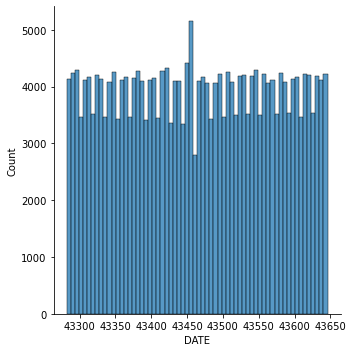

<Figure size 432x288 with 0 Axes>

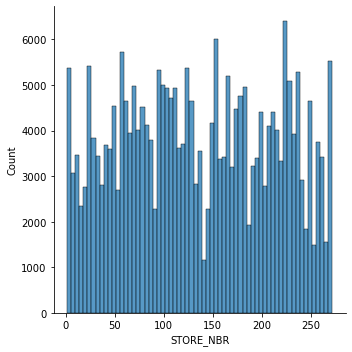

<Figure size 432x288 with 0 Axes>

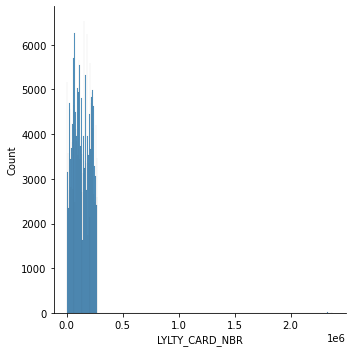

<Figure size 432x288 with 0 Axes>

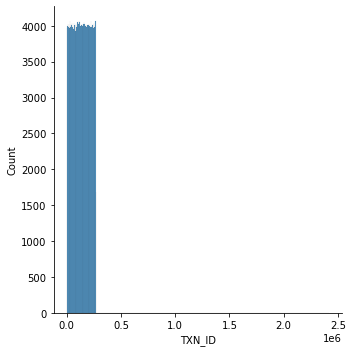

<Figure size 432x288 with 0 Axes>

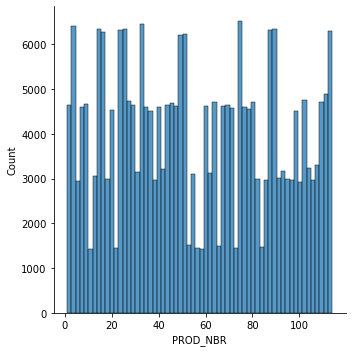

<Figure size 432x288 with 0 Axes>

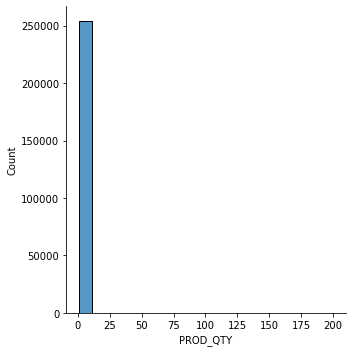

<Figure size 432x288 with 0 Axes>

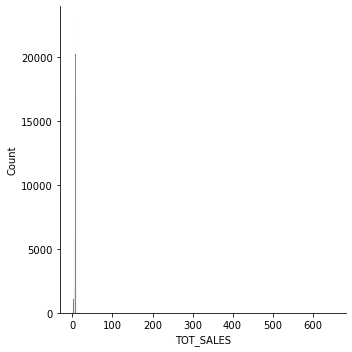

<Figure size 432x288 with 0 Axes>

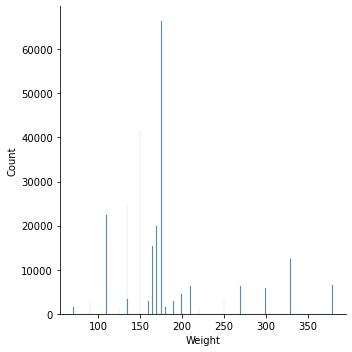

In [19]:
num_var = df1.select_dtypes(['int64','float64'])

for num in num_var:
    plt.figure()
    sns.displot(num_var[num])
    plt.show()

Let's look up at the description statistics and spot if we hav outliers.

In [20]:
num_var.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,Weight
count,254074.000000,254074.000000,2.540740e+05,2.540740e+05,254074.000000,254074.000000,254074.000000,254074.000000
mean,43464.091418,135.071967,1.355426e+05,1.351521e+05,56.159603,1.907354,7.228539,178.295843
std,105.405002,76.760175,8.057881e+04,7.811318e+04,33.282453,0.653401,3.088882,61.505721
min,43282.000000,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000,70.000000
25%,43373.000000,70.000000,7.002800e+04,6.765925e+04,28.000000,2.000000,5.400000,150.000000
50%,43464.000000,130.000000,1.303540e+05,1.351265e+05,52.000000,2.000000,7.400000,170.000000
75%,43555.000000,203.000000,2.030808e+05,2.026408e+05,86.000000,2.000000,8.800000,175.000000
max,43646.000000,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000,380.000000


<AxesSubplot:xlabel='TOT_SALES'>

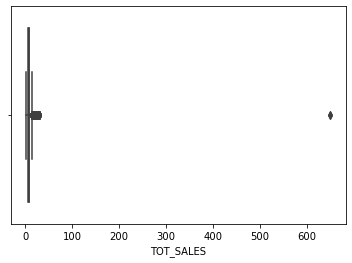

In [21]:
sns.boxplot(num_var.TOT_SALES)

<AxesSubplot:xlabel='PROD_QTY'>

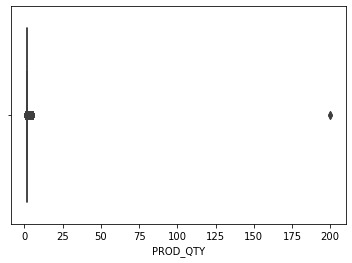

In [22]:
sns.boxplot(num_var.PROD_QTY)

Box plots as well as description table show that we have outliers at product quality (200) and total sales (650.0).

In [23]:
df1.loc[num_var.TOT_SALES>600]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Weight
69762,43331,226,226000,226201,4,dorito corn chp supreme,200,650.0,380
69763,43605,226,226000,226210,4,dorito corn chp supreme,200,650.0,380


We can observe, that Dorito Corn Chp Supreme was sold in quantity of 200 with total sales 650. Per price for 1 pack is 3.25. 

**3.25*200 = 650**

We will not remove the outliers as they carry important information about the orders.

In [24]:
df1.loc[num_var.LYLTY_CARD_NBR==226000]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Weight
69762,43331,226,226000,226201,4,dorito corn chp supreme,200,650.0,380
69763,43605,226,226000,226210,4,dorito corn chp supreme,200,650.0,380


In [25]:
df1.drop(index=[69762,69763])

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Weight
0,43390,1,1000,1,5,natural chip compny seasalt,2,6.0,175
1,43599,1,1307,348,66,ccs nacho cheese,3,6.3,175
2,43605,1,1343,383,61,smiths crinkle cut chips chicken,2,2.9,170
3,43329,2,2373,974,69,smiths chip thinly s/cream&onion,5,15.0,175
4,43330,2,2426,1038,108,kettle tortilla chpshny&jlpno chili,3,13.8,150
...,...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,kettle sweet chilli and sour cream,2,10.8,175
264832,43325,272,272358,270154,74,tostitos splash of lime,1,4.4,175
264833,43410,272,272379,270187,51,doritos mexicana,2,8.8,170
264834,43461,272,272379,270188,42,doritos corn chip mexican jalapeno,2,7.8,150


In [26]:
df = df2.merge(df1, on = 'LYLTY_CARD_NBR')
df

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Weight
0,1000,YOUNG SINGLES/COUPLES,Premium,43390,1,1,5,natural chip compny seasalt,2,6.0,175
1,1002,YOUNG SINGLES/COUPLES,Mainstream,43359,1,2,58,red rock deli chikn&arlic aioli,1,2.7,150
2,1003,YOUNG FAMILIES,Budget,43531,1,3,52,rain waves sour cream&chives,1,3.6,210
3,1003,YOUNG FAMILIES,Budget,43532,1,4,106,natural chipco hony soy chckn,1,3.0,175
4,1004,OLDER SINGLES/COUPLES,Mainstream,43406,1,5,96,ww oriinal stacked chips,1,1.9,160
...,...,...,...,...,...,...,...,...,...,...,...
254069,2370651,MIDAGE SINGLES/COUPLES,Mainstream,43315,88,240350,4,dorito corn chp supreme,2,13.0,380
254070,2370701,YOUNG FAMILIES,Mainstream,43442,88,240378,24,rain waves sweet chilli,2,7.2,210
254071,2370751,YOUNG FAMILIES,Premium,43374,88,240394,60,kettle tortilla chpsfeta&arlic,2,9.2,150
254072,2370961,OLDER FAMILIES,Budget,43397,88,240480,70,tyrrells crisps lihtly salted,2,8.4,165



Let's see if there's any human errors or mistakes in categories names.

In [27]:
df.LIFESTAGE.unique() 

array(['YOUNG SINGLES/COUPLES', 'YOUNG FAMILIES', 'OLDER SINGLES/COUPLES',
       'MIDAGE SINGLES/COUPLES', 'NEW FAMILIES', 'OLDER FAMILIES',
       'RETIREES'], dtype=object)

In [28]:
df.PREMIUM_CUSTOMER.unique()

array(['Premium', 'Mainstream', 'Budget'], dtype=object)

In [29]:
df['BRAND'] = df['PROD_NAME'].str.split(' ').str[0]

In [30]:
df['BRAND'].unique()

array(['natural', 'red', 'rain', 'ww', 'cheetos', 'infuzions', 'rrd',
       'doritos', 'rnwves', 'smiths', 'kettle', 'ccs', 'tostitos', 'cobs',
       'burer', 'woolworths', 'thins', 'tyrrells', 'smith', 'cheezels',
       'twisties', 'sunbites', 'snbts', 'prinles', 'french', 'infzns',
       'dorito', 'ncc'], dtype=object)

In [31]:
df['PROD_NAME'].unique()

array(['natural chip        compny seasalt',
       'red rock deli chikn&arlic aioli ',
       'rain waves sour    cream&chives ',
       'natural chipco      hony soy chckn', 'ww oriinal stacked chips ',
       'cheetos puffs ', 'infuzions sourcream&herbs ve strws ',
       'rrd sr slow rst     pork belly ', 'doritos cheese      supreme ',
       'doritos mexicana    ', 'rnwves plus btroot & chilli jam ',
       'smiths crinkle cut  chips barbecue ',
       'kettle sensations   camembert & fi ',
       'doritos corn chip southern chicken ', 'ccs tasty cheese    ',
       'tostitos splash of  lime ', 'kettle  swt pot sea salt',
       'rrd salt & vinear  ', 'infuzions mano     chutny papadums ',
       'smiths crinkle cut  sna&sauce ', 'smiths crinkle      oriinal ',
       'rrd sweet chilli &  sour cream ',
       'smiths chip thinly  s/cream&onion ',
       'smiths crinkle chips salt & vinear ',
       'red rock deli sr    salsa & mzzrlla ',
       'cobs popd sea salt  chips ', 'natu

In [32]:
df['BRAND']=df['BRAND'].replace('rrd', 'RRD', regex=True)
df['BRAND']=df['BRAND'].replace('rnwves', 'RAIN WAVES', regex=True)
df['BRAND']=df['BRAND'].replace('ww', 'WOOLWORTHS', regex=True)
df['BRAND']=df['BRAND'].replace('smith', 'SMITHS', regex=True)
df['BRAND']=df['BRAND'].replace('snbts', 'SUNBITES', regex=True)
df['BRAND']=df['BRAND'].replace('infzns', 'INFUZIONS', regex=True)
df['BRAND']=df['BRAND'].replace('ncc', 'NATURAL', regex=True)

In [33]:
df

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Weight,BRAND
0,1000,YOUNG SINGLES/COUPLES,Premium,43390,1,1,5,natural chip compny seasalt,2,6.0,175,natural
1,1002,YOUNG SINGLES/COUPLES,Mainstream,43359,1,2,58,red rock deli chikn&arlic aioli,1,2.7,150,red
2,1003,YOUNG FAMILIES,Budget,43531,1,3,52,rain waves sour cream&chives,1,3.6,210,rain
3,1003,YOUNG FAMILIES,Budget,43532,1,4,106,natural chipco hony soy chckn,1,3.0,175,natural
4,1004,OLDER SINGLES/COUPLES,Mainstream,43406,1,5,96,ww oriinal stacked chips,1,1.9,160,WOOLWORTHS
...,...,...,...,...,...,...,...,...,...,...,...,...
254069,2370651,MIDAGE SINGLES/COUPLES,Mainstream,43315,88,240350,4,dorito corn chp supreme,2,13.0,380,dorito
254070,2370701,YOUNG FAMILIES,Mainstream,43442,88,240378,24,rain waves sweet chilli,2,7.2,210,rain
254071,2370751,YOUNG FAMILIES,Premium,43374,88,240394,60,kettle tortilla chpsfeta&arlic,2,9.2,150,kettle
254072,2370961,OLDER FAMILIES,Budget,43397,88,240480,70,tyrrells crisps lihtly salted,2,8.4,165,tyrrells


In [34]:
df['BRAND'].unique()

array(['natural', 'red', 'rain', 'WOOLWORTHS', 'cheetos', 'infuzions',
       'RRD', 'doritos', 'RAIN WAVES', 'SMITHSs', 'kettle', 'ccs',
       'tostitos', 'cobs', 'burer', 'woolworths', 'thins', 'tyrrells',
       'SMITHS', 'cheezels', 'twisties', 'sunbites', 'SUNBITES',
       'prinles', 'french', 'INFUZIONS', 'dorito', 'NATURAL'],
      dtype=object)

In [35]:
df = df.replace({'natural':'NATURAL',
                'red':'RRD',
                'rain':'RAIN WAVES',
                'cheetos':'CHEETOS',
                'infuzions':'INFUZIONS',
                'doritos':'DORITOS',
                'SMITHSs':'SMITHS',
                'kettle':'KETTLE',
                'ccs':'CCS',
                'tostitos':'TOSTITOS',
                'cobs':'COBS',
                'cheezels':'CHEEZELS',
                'twisties':'TWISTIES',
                'sunbites':'SUNBITES',
                'burer':'BURGER',
                'woolworths':'WOOLWORTHS',
                'thins':'THINS',
                'tyrrells':'TYRRELS',
                'prinles':'PRINGLES',
                'french':'FRENCH FRIES POTATO',
                'dorito':'DORITOS'})

In [36]:
df['BRAND'].unique()

array(['NATURAL', 'RRD', 'RAIN WAVES', 'WOOLWORTHS', 'CHEETOS',
       'INFUZIONS', 'DORITOS', 'SMITHS', 'KETTLE', 'CCS', 'TOSTITOS',
       'COBS', 'BURGER', 'THINS', 'TYRRELS', 'CHEEZELS', 'TWISTIES',
       'SUNBITES', 'PRINGLES', 'FRENCH FRIES POTATO'], dtype=object)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 254074 entries, 0 to 254073
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LYLTY_CARD_NBR    254074 non-null  int64  
 1   LIFESTAGE         254074 non-null  object 
 2   PREMIUM_CUSTOMER  254074 non-null  object 
 3   DATE              254074 non-null  int64  
 4   STORE_NBR         254074 non-null  int64  
 5   TXN_ID            254074 non-null  int64  
 6   PROD_NBR          254074 non-null  int64  
 7   PROD_NAME         254074 non-null  object 
 8   PROD_QTY          254074 non-null  int64  
 9   TOT_SALES         254074 non-null  float64
 10  Weight            254074 non-null  int64  
 11  BRAND             254074 non-null  object 
dtypes: float64(1), int64(7), object(4)
memory usage: 25.2+ MB


In [38]:
df

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Weight,BRAND
0,1000,YOUNG SINGLES/COUPLES,Premium,43390,1,1,5,natural chip compny seasalt,2,6.0,175,NATURAL
1,1002,YOUNG SINGLES/COUPLES,Mainstream,43359,1,2,58,red rock deli chikn&arlic aioli,1,2.7,150,RRD
2,1003,YOUNG FAMILIES,Budget,43531,1,3,52,rain waves sour cream&chives,1,3.6,210,RAIN WAVES
3,1003,YOUNG FAMILIES,Budget,43532,1,4,106,natural chipco hony soy chckn,1,3.0,175,NATURAL
4,1004,OLDER SINGLES/COUPLES,Mainstream,43406,1,5,96,ww oriinal stacked chips,1,1.9,160,WOOLWORTHS
...,...,...,...,...,...,...,...,...,...,...,...,...
254069,2370651,MIDAGE SINGLES/COUPLES,Mainstream,43315,88,240350,4,dorito corn chp supreme,2,13.0,380,DORITOS
254070,2370701,YOUNG FAMILIES,Mainstream,43442,88,240378,24,rain waves sweet chilli,2,7.2,210,RAIN WAVES
254071,2370751,YOUNG FAMILIES,Premium,43374,88,240394,60,kettle tortilla chpsfeta&arlic,2,9.2,150,KETTLE
254072,2370961,OLDER FAMILIES,Budget,43397,88,240480,70,tyrrells crisps lihtly salted,2,8.4,165,TYRRELS


### Who spends the most on chips (total sales), describing customers by lifestage and how premium their general purchasing behaviour is

<AxesSubplot:xlabel='LIFESTAGE', ylabel='TOT_SALES'>

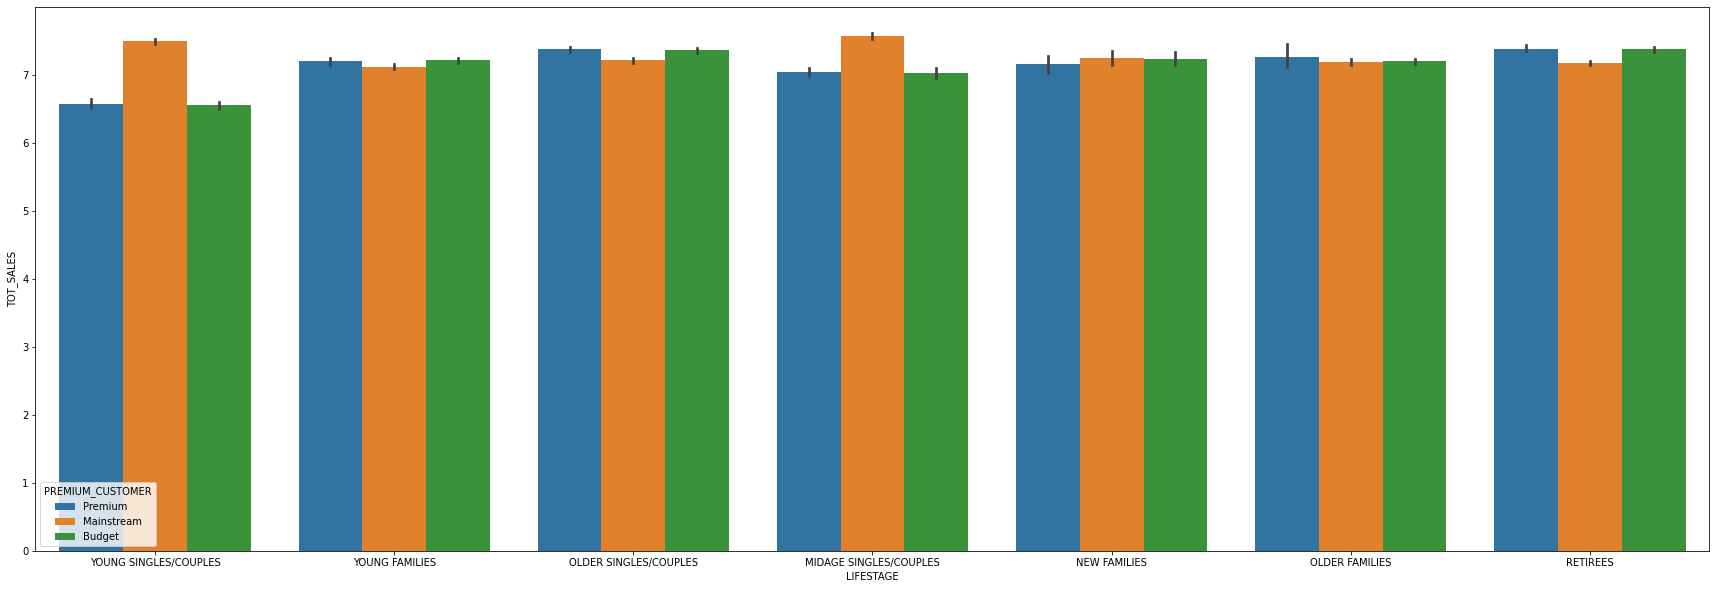

In [39]:
plt.figure(figsize=(30,10))
sns.barplot(data = df, x='LIFESTAGE', y='TOT_SALES', hue = 'PREMIUM_CUSTOMER')

We see that most on chips spend **Young/Single couples(Mainstream)**, **Midage/Single couples(Mainstream)**

### How many customers are in each segment

<AxesSubplot:xlabel='LIFESTAGE', ylabel='count'>

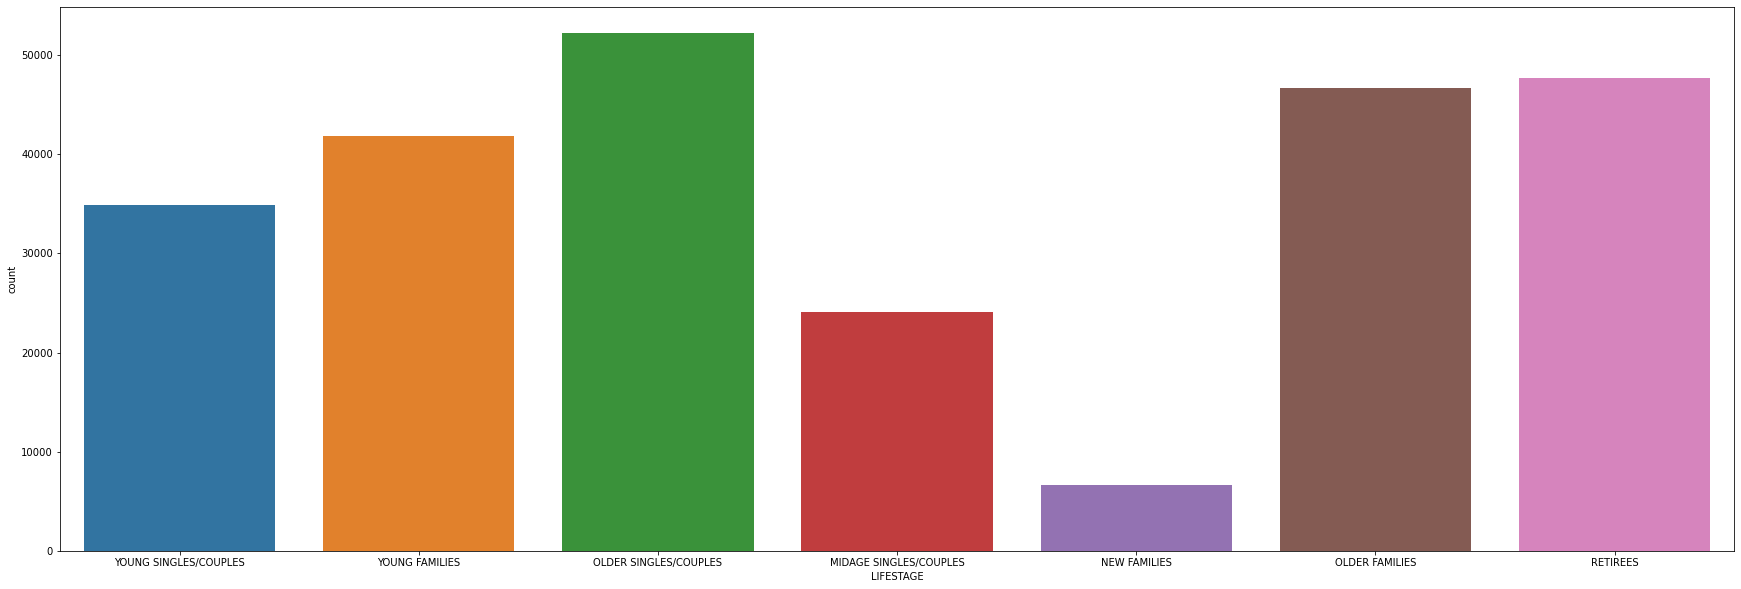

In [40]:
plt.figure(figsize=(30,10))
sns.countplot(data = df, x='LIFESTAGE')

In [41]:
df.LIFESTAGE.value_counts()

OLDER SINGLES/COUPLES     52230
RETIREES                  47696
OLDER FAMILIES            46714
YOUNG FAMILIES            41850
YOUNG SINGLES/COUPLES     34871
MIDAGE SINGLES/COUPLES    24070
NEW FAMILIES               6643
Name: LIFESTAGE, dtype: int64

### How many chips are bought per customer by segment

In [42]:
chips_1 = df[['LIFESTAGE','PREMIUM_CUSTOMER','PROD_QTY']]
maximum = chips_1.groupby(by=['LIFESTAGE','PREMIUM_CUSTOMER']).sum()
maximum.sort_values(by='PROD_QTY', ascending=False)

PROD_QTY
LIFESTAGE              PREMIUM_CUSTOMER          
OLDER FAMILIES         Budget               43286
RETIREES               Mainstream           38865
YOUNG SINGLES/COUPLES  Mainstream           36895
YOUNG FAMILIES         Budget               35592
OLDER SINGLES/COUPLES  Budget               33717
                       Mainstream           33605
                       Premium              32579
RETIREES               Budget               27558
OLDER FAMILIES         Mainstream           26697
YOUNG FAMILIES         Mainstream           24077
RETIREES               Premium              23822
MIDAGE SINGLES/COUPLES Mainstream           21653
YOUNG FAMILIES         Premium              21522
OLDER FAMILIES         Premium              21347
YOUNG SINGLES/COUPLES  Budget               16041
MIDAGE SINGLES/COUPLES Premium              14944
YOUNG SINGLES/COUPLES  Premium              10935
MIDAGE SINGLES/COUPLES Budget                9148
NEW FAMILIES           Budget                5341
                       Mainstream            4144
                       Premium               2841

In [43]:
chips = df[['LIFESTAGE','PROD_QTY']]
maximum = chips.groupby(by='LIFESTAGE').sum()
maximum.sort_values(by='PROD_QTY', ascending=False)

,PROD_QTY
LIFESTAGE,
OLDER SINGLES/COUPLES,99901
OLDER FAMILIES,91330
RETIREES,90245
YOUNG FAMILIES,81191
YOUNG SINGLES/COUPLES,63871
MIDAGE SINGLES/COUPLES,45745
NEW FAMILIES,12326


### What's the average chip price by customer segment

In [44]:
price = df[['LIFESTAGE','PREMIUM_CUSTOMER','TOT_SALES','PROD_QTY']]
price['PER_PACK'] = price['TOT_SALES']/price['PROD_QTY']
price = price.drop(columns=['TOT_SALES','PROD_QTY'])
av_price = price.groupby(by=['LIFESTAGE','PREMIUM_CUSTOMER']).mean()
av_price

PER_PACK
LIFESTAGE              PREMIUM_CUSTOMER          
MIDAGE SINGLES/COUPLES Budget            3.696991
                       Mainstream        3.957258
                       Premium           3.712462
NEW FAMILIES           Budget            3.882738
                       Mainstream        3.878447
                       Premium           3.831696
OLDER FAMILIES         Budget            3.694479
                       Mainstream        3.685811
                       Premium           3.665448
OLDER SINGLES/COUPLES  Budget            3.838290
                       Mainstream        3.765986
                       Premium           3.846742
RETIREES               Budget            3.885247
                       Mainstream        3.792358
                       Premium           3.879950
YOUNG FAMILIES         Budget            3.711429
                       Mainstream        3.667543
                       Premium           3.714883
YOUNG SINGLES/COUPLES  Budget            3.600371
                       Mainstream        4.032182
                       Premium           3.609548

Text(0.5, 1.0, 'Average chip price by customer segment')

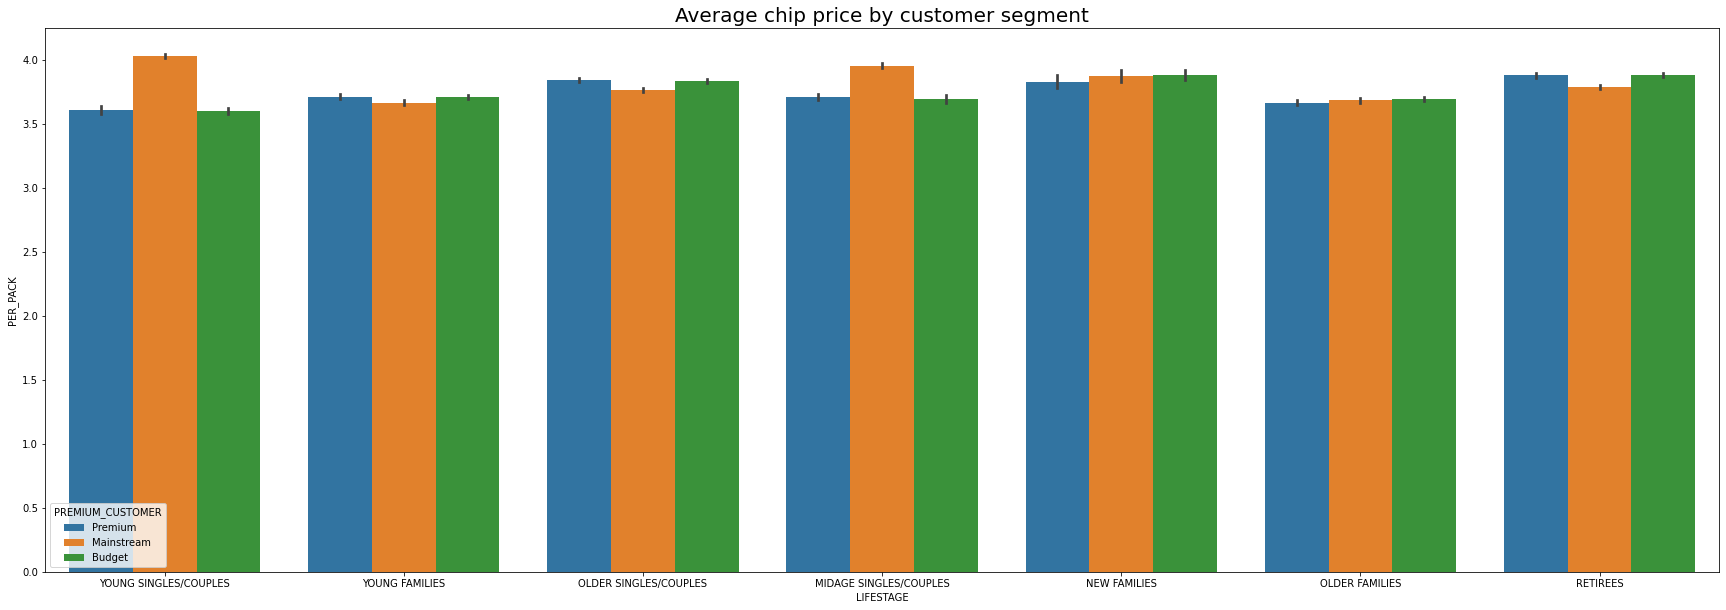

In [45]:
plt.figure(figsize=(30,10))
sns.barplot(data = price, x='LIFESTAGE', y='PER_PACK', hue='PREMIUM_CUSTOMER')
plt.title('Average chip price by customer segment', size = 20)

### Perform an independent t-test between mainstream midage and young singles and couples

H0: There's no difference between mainstream midage and young singles and couples. 

H1: At least one customer segment is different.

In [46]:
young_coup = price.loc[(price.LIFESTAGE == 'YOUNG SINGLES/COUPLES') | (price.LIFESTAGE == 'MIDAGE SINGLES/COUPLES')]
young_coup

,LIFESTAGE,PREMIUM_CUSTOMER,PER_PACK
0,YOUNG SINGLES/COUPLES,Premium,3.0
1,YOUNG SINGLES/COUPLES,Mainstream,2.7
5,MIDAGE SINGLES/COUPLES,Mainstream,2.8
6,YOUNG SINGLES/COUPLES,Budget,3.8
7,YOUNG SINGLES/COUPLES,Budget,2.7
...,...,...,...
254058,YOUNG SINGLES/COUPLES,Budget,4.4
254059,YOUNG SINGLES/COUPLES,Mainstream,4.3
254065,YOUNG SINGLES/COUPLES,Mainstream,5.4
254069,MIDAGE SINGLES/COUPLES,Mainstream,6.5


In [47]:
samp1=young_coup.loc[(young_coup.PREMIUM_CUSTOMER=='Mainstream') &(young_coup.LIFESTAGE=='YOUNG SINGLES/COUPLES')]
samp1 = samp1.sample(n=10, random_state = 14)
samp1.reset_index(inplace=True)

samp1

,index,LIFESTAGE,PREMIUM_CUSTOMER,PER_PACK
0,50389,YOUNG SINGLES/COUPLES,Mainstream,3.8
1,108834,YOUNG SINGLES/COUPLES,Mainstream,1.9
2,39351,YOUNG SINGLES/COUPLES,Mainstream,5.9
3,243675,YOUNG SINGLES/COUPLES,Mainstream,4.4
4,33089,YOUNG SINGLES/COUPLES,Mainstream,3.0
5,140657,YOUNG SINGLES/COUPLES,Mainstream,3.7
6,24638,YOUNG SINGLES/COUPLES,Mainstream,5.4
7,187258,YOUNG SINGLES/COUPLES,Mainstream,6.5
8,11099,YOUNG SINGLES/COUPLES,Mainstream,1.7
9,121284,YOUNG SINGLES/COUPLES,Mainstream,4.6


In [48]:
samp2=young_coup.loc[(young_coup.PREMIUM_CUSTOMER=='Mainstream') &(young_coup.LIFESTAGE=='MIDAGE SINGLES/COUPLES')]
samp2 = samp2.sample(n=10, random_state = 14)
samp2.reset_index(inplace=True)

samp2

,index,LIFESTAGE,PREMIUM_CUSTOMER,PER_PACK
0,250592,MIDAGE SINGLES/COUPLES,Mainstream,2.9
1,16661,MIDAGE SINGLES/COUPLES,Mainstream,4.2
2,245949,MIDAGE SINGLES/COUPLES,Mainstream,4.6
3,110347,MIDAGE SINGLES/COUPLES,Mainstream,2.7
4,221720,MIDAGE SINGLES/COUPLES,Mainstream,2.9
5,98202,MIDAGE SINGLES/COUPLES,Mainstream,3.8
6,175066,MIDAGE SINGLES/COUPLES,Mainstream,3.7
7,169358,MIDAGE SINGLES/COUPLES,Mainstream,1.9
8,59726,MIDAGE SINGLES/COUPLES,Mainstream,4.2
9,211903,MIDAGE SINGLES/COUPLES,Mainstream,2.7


In [49]:
samp1 = pd.Series(samp1.PER_PACK, name = 'YOUNG')
samp2 = pd.Series(samp2.PER_PACK, name = 'MIDAGE')

In [50]:
test_table = pd.concat([samp1,samp2], axis=1)
test_table

,YOUNG,MIDAGE
0,3.8,2.9
1,1.9,4.2
2,5.9,4.6
3,4.4,2.7
4,3.0,2.9
5,3.7,3.8
6,5.4,3.7
7,6.5,1.9
8,1.7,4.2
9,4.6,2.7


In [51]:
print('YOUNG MEAN IS: ', round(test_table.YOUNG.mean(),2))
print('MIDAGE MEAN IS: ', round(test_table.MIDAGE.mean(),2))

YOUNG MEAN IS:  4.09
MIDAGE MEAN IS:  3.36


In [52]:
print('OVERALL MEAN IS: ', round((4.09+3.36)/2,2))

OVERALL MEAN IS:  3.72


In [53]:
print('SST IS: ', round(sum((test_table.YOUNG - 3.72)**2+(test_table.MIDAGE - 3.72)**2),2))

SST IS:  32.44


In [54]:
print('SSC IS: ', round(10*(4.09-3.72)**2+10*(3.36-3.72)**2,2))

SSC IS:  2.67


In [55]:
print('SSE IS: ', round(sum((test_table.YOUNG - 4.09)**2+(test_table.MIDAGE - 3.36)**2),2))

SSE IS:  29.77


In [56]:
print('MSC IS: ', round(2.67/(2-1),2))

MSC IS:  2.67


In [57]:
print('MSE IS: ', round(29.77/(20-2),2))

MSE IS:  1.65


In [58]:
print('F-TEST IS:', round(2.67/1.65,2))

F-TEST IS: 1.62


CV from the table is 4.41 with df between = 1 and df within = 18. There's no significant difference in mean test score between mainstream midage couples and mainstream young couple as we don't reject H0.

### Brands that midage couples and young couple prefer more than others

In [59]:
df

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Weight,BRAND
0,1000,YOUNG SINGLES/COUPLES,Premium,43390,1,1,5,natural chip compny seasalt,2,6.0,175,NATURAL
1,1002,YOUNG SINGLES/COUPLES,Mainstream,43359,1,2,58,red rock deli chikn&arlic aioli,1,2.7,150,RRD
2,1003,YOUNG FAMILIES,Budget,43531,1,3,52,rain waves sour cream&chives,1,3.6,210,RAIN WAVES
3,1003,YOUNG FAMILIES,Budget,43532,1,4,106,natural chipco hony soy chckn,1,3.0,175,NATURAL
4,1004,OLDER SINGLES/COUPLES,Mainstream,43406,1,5,96,ww oriinal stacked chips,1,1.9,160,WOOLWORTHS
...,...,...,...,...,...,...,...,...,...,...,...,...
254069,2370651,MIDAGE SINGLES/COUPLES,Mainstream,43315,88,240350,4,dorito corn chp supreme,2,13.0,380,DORITOS
254070,2370701,YOUNG FAMILIES,Mainstream,43442,88,240378,24,rain waves sweet chilli,2,7.2,210,RAIN WAVES
254071,2370751,YOUNG FAMILIES,Premium,43374,88,240394,60,kettle tortilla chpsfeta&arlic,2,9.2,150,KETTLE
254072,2370961,OLDER FAMILIES,Budget,43397,88,240480,70,tyrrells crisps lihtly salted,2,8.4,165,TYRRELS


In [60]:
brands = df[['LIFESTAGE','PREMIUM_CUSTOMER','PROD_QTY','BRAND']]
brands = brands.loc[(brands.LIFESTAGE=='YOUNG SINGLES/COUPLES')|(brands.LIFESTAGE=='MIDAGE SINGLES/COUPLES')]
brands

,LIFESTAGE,PREMIUM_CUSTOMER,PROD_QTY,BRAND
0,YOUNG SINGLES/COUPLES,Premium,2,NATURAL
1,YOUNG SINGLES/COUPLES,Mainstream,1,RRD
5,MIDAGE SINGLES/COUPLES,Mainstream,1,CHEETOS
6,YOUNG SINGLES/COUPLES,Budget,1,INFUZIONS
7,YOUNG SINGLES/COUPLES,Budget,1,RRD
...,...,...,...,...
254058,YOUNG SINGLES/COUPLES,Budget,1,TOSTITOS
254059,YOUNG SINGLES/COUPLES,Mainstream,2,TWISTIES
254065,YOUNG SINGLES/COUPLES,Mainstream,2,KETTLE
254069,MIDAGE SINGLES/COUPLES,Mainstream,2,DORITOS


In [61]:
pivot = pd.pivot_table(data = brands,
                      values='PROD_QTY',
                      index = 'BRAND',
                      columns = 'LIFESTAGE',
                      aggfunc=np.sum)
pivot

LIFESTAGE,MIDAGE SINGLES/COUPLES,YOUNG SINGLES/COUPLES
BRAND,,
BURGER,287,313
CCS,818,1054
CHEETOS,489,635
CHEEZELS,846,1135
COBS,1841,2591
DORITOS,5078,7438
FRENCH FRIES POTATO,218,339
INFUZIONS,2685,3748
KETTLE,7755,10993


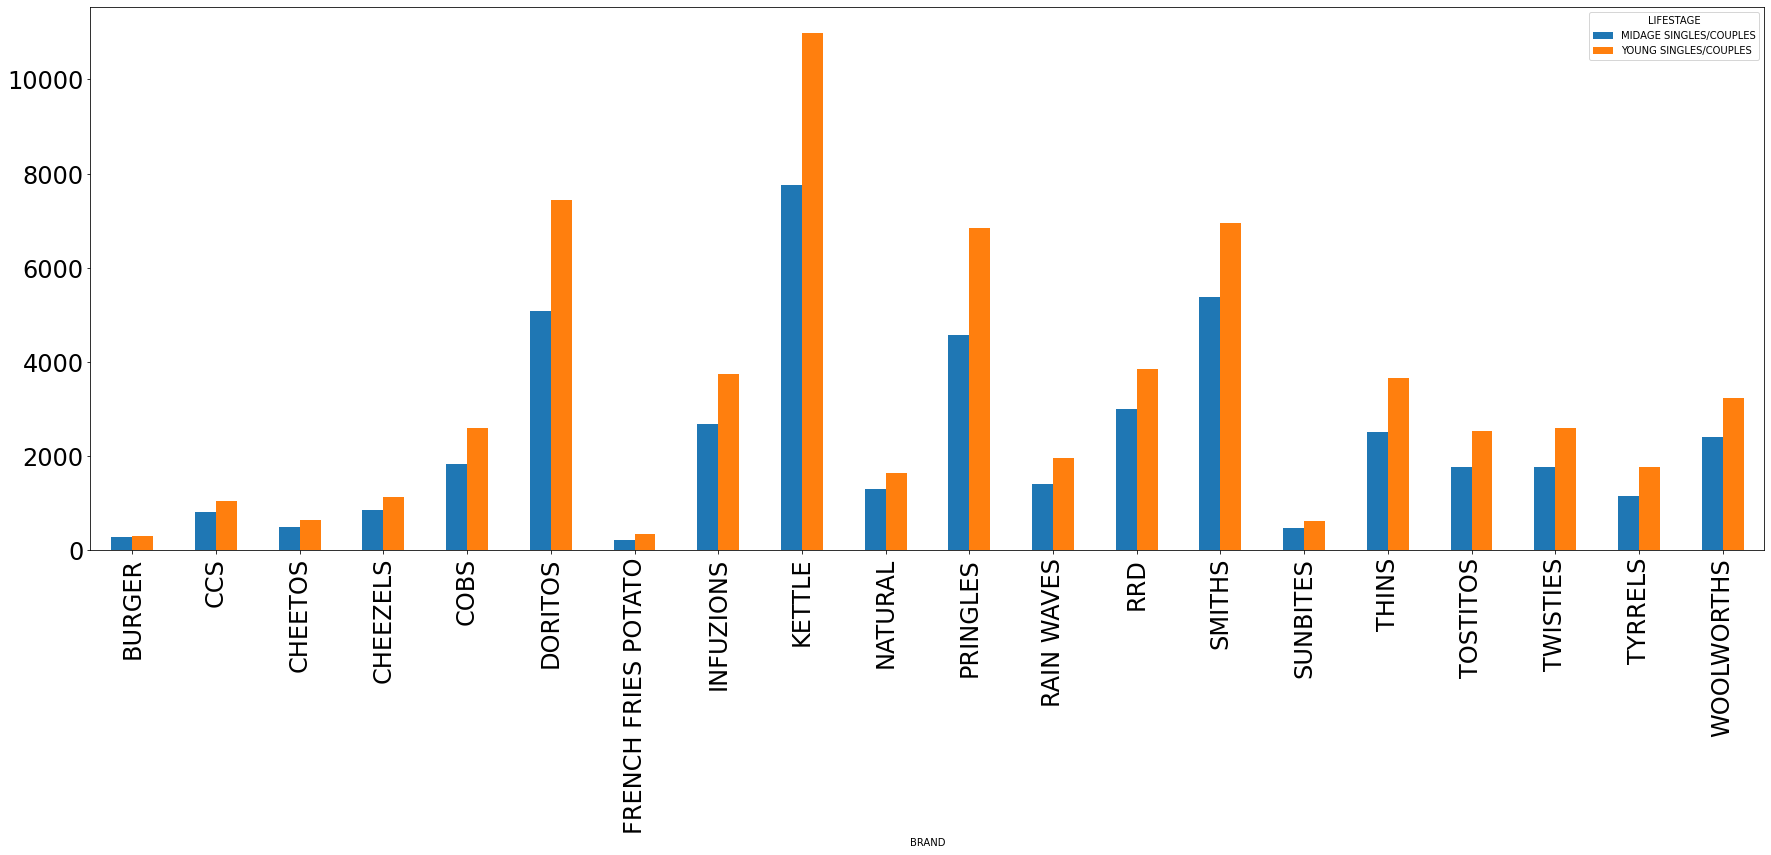

In [62]:
pivot.plot(kind = 'bar',figsize=(30,10),fontsize=24)

plt.show()

It appears that Kettle Tortilla Chips brand is the most popular. The second place share doritos, smiths and pringles.

### Testing

In [63]:
df3 = pd.read_csv('QVI_data.csv')

In [64]:
df3['Customer_count'] = 1
df3

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,Customer_count
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium,1
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream,1
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget,1
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget,1
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
264829,2370701,2018-12-08,88,240378,24,Grain Waves Sweet Chilli 210g,2,7.2,210,GRNWVES,YOUNG FAMILIES,Mainstream,1
264830,2370751,2018-10-01,88,240394,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,150,KETTLE,YOUNG FAMILIES,Premium,1
264831,2370961,2018-10-24,88,240480,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,165,TYRRELLS,OLDER FAMILIES,Budget,1
264832,2370961,2018-10-27,88,240481,65,Old El Paso Salsa Dip Chnky Tom Ht300g,2,10.2,300,OLD,OLDER FAMILIES,Budget,1


In [65]:
df3['DATE'] = pd.to_datetime(df3['DATE'])
df3.sort_values(by = 'DATE',ascending=True,inplace=True)
df3.set_index('DATE', inplace = True)
df3

,LYLTY_CARD_NBR,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,Customer_count
DATE,,,,,,,,,,,,
2018-07-01,104039,104,103937,53,RRD Sweet Chilli & Sour Cream 165g,2,6.0,165,RRD,OLDER SINGLES/COUPLES,Premium,1
2018-07-01,118107,118,121300,33,Cobs Popd Swt/Chlli &Sr/Cream Chips 110g,2,7.6,110,COBS,RETIREES,Mainstream,1
2018-07-01,226024,226,226348,114,Kettle Sensations Siracha Lime 150g,2,9.2,150,KETTLE,YOUNG FAMILIES,Premium,1
2018-07-01,152040,152,150459,25,Pringles SourCream Onion 134g,2,7.4,134,PRINGLES,YOUNG FAMILIES,Mainstream,1
2018-07-01,33140,33,30342,10,RRD SR Slow Rst Pork Belly 150g,2,5.4,150,RRD,YOUNG FAMILIES,Mainstream,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-30,90228,90,88954,77,Doritos Corn Chips Nacho Cheese 170g,2,8.8,170,DORITOS,YOUNG SINGLES/COUPLES,Premium,1
2019-06-30,199122,199,198088,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,150,DORITOS,NEW FAMILIES,Premium,1
2019-06-30,199117,199,198068,77,Doritos Corn Chips Nacho Cheese 170g,2,8.8,170,DORITOS,MIDAGE SINGLES/COUPLES,Mainstream,1


In [66]:
df3_77 = df3.loc[df3.STORE_NBR == 77]
df3_77

,LYLTY_CARD_NBR,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,Customer_count
DATE,,,,,,,,,,,,
2018-07-01,77456,77,75408,64,Red Rock Deli SR Salsa & Mzzrlla 150g,2,5.4,150,RRD,RETIREES,Mainstream,1
2018-07-01,77386,77,75324,57,Old El Paso Salsa Dip Tomato Mild 300g,2,10.2,300,OLD,YOUNG FAMILIES,Budget,1
2018-07-02,77482,77,75443,72,WW Crinkle Cut Original 175g,2,3.4,175,WOOLWORTHS,RETIREES,Premium,1
2018-07-03,77495,77,75457,19,Smiths Crinkle Cut Snag&Sauce 150g,1,2.6,150,SMITHS,MIDAGE SINGLES/COUPLES,Mainstream,1
2018-07-05,77210,77,75134,96,WW Original Stacked Chips 160g,2,3.8,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Budget,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-28,77076,77,74991,53,RRD Sweet Chilli & Sour Cream 165g,2,6.0,165,RRD,YOUNG SINGLES/COUPLES,Budget,1
2019-06-29,2330271,77,236749,114,Kettle Sensations Siracha Lime 150g,2,9.2,150,KETTLE,YOUNG FAMILIES,Mainstream,1
2019-06-29,77332,77,75273,107,Smiths Crinkle Cut French OnionDip 150g,2,5.2,150,SMITHS,YOUNG SINGLES/COUPLES,Mainstream,1


In [67]:
df3_86 = df3.loc[df3.STORE_NBR == 86]
df3_86

,LYLTY_CARD_NBR,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,Customer_count
DATE,,,,,,,,,,,,
2018-07-01,86082,86,84643,3,Kettle Sensations Camembert & Fig 150g,2,9.2,150,KETTLE,OLDER FAMILIES,Budget,1
2018-07-01,86016,86,84237,48,Red Rock Deli Sp Salt & Truffle 150G,2,5.4,150,RRD,RETIREES,Mainstream,1
2018-07-01,86203,86,85392,19,Smiths Crinkle Cut Snag&Sauce 150g,2,5.2,150,SMITHS,RETIREES,Budget,1
2018-07-01,86222,86,85493,17,Kettle Sensations BBQ&Maple 150g,2,9.2,150,KETTLE,YOUNG FAMILIES,Premium,1
2018-07-01,86187,86,85295,74,Tostitos Splash Of Lime 175g,2,8.8,175,TOSTITOS,YOUNG SINGLES/COUPLES,Mainstream,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-28,86186,86,85294,13,Red Rock Deli Thai Chilli&Lime 150g,2,5.4,150,RRD,YOUNG FAMILIES,Mainstream,1
2019-06-29,86107,86,84795,65,Old El Paso Salsa Dip Chnky Tom Ht300g,2,10.2,300,OLD,YOUNG FAMILIES,Mainstream,1
2019-06-29,86144,86,85046,44,Thins Chips Light& Tangy 175g,2,6.6,175,THINS,OLDER SINGLES/COUPLES,Budget,1


In [68]:
df3_88 = df3.loc[df3.STORE_NBR == 88]
df3_88

,LYLTY_CARD_NBR,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,Customer_count
DATE,,,,,,,,,,,,
2018-07-01,88283,88,87636,112,Tyrrells Crisps Ched & Chives 165g,2,8.4,165,TYRRELLS,RETIREES,Premium,1
2018-07-01,88155,88,86995,68,Pringles Chicken Salt Crips 134g,2,7.4,134,PRINGLES,OLDER FAMILIES,Mainstream,1
2018-07-01,88102,88,86731,40,Thins Chips Seasonedchicken 175g,2,6.6,175,THINS,YOUNG FAMILIES,Premium,1
2018-07-01,88140,88,86914,25,Pringles SourCream Onion 134g,2,7.4,134,PRINGLES,MIDAGE SINGLES/COUPLES,Mainstream,1
2018-07-01,88076,88,86585,9,Kettle Tortilla ChpsBtroot&Ricotta 150g,2,9.2,150,KETTLE,MIDAGE SINGLES/COUPLES,Mainstream,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-29,88237,88,87384,24,Grain Waves Sweet Chilli 210g,2,7.2,210,GRNWVES,YOUNG SINGLES/COUPLES,Mainstream,1
2019-06-30,88261,88,87532,52,Grain Waves Sour Cream&Chives 210G,2,7.2,210,GRNWVES,RETIREES,Mainstream,1
2019-06-30,88199,88,87204,68,Pringles Chicken Salt Crips 134g,2,7.4,134,PRINGLES,RETIREES,Mainstream,1


In [69]:
df3_77.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 563 entries, 2018-07-01 to 2019-06-30
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   LYLTY_CARD_NBR    563 non-null    int64  
 1   STORE_NBR         563 non-null    int64  
 2   TXN_ID            563 non-null    int64  
 3   PROD_NBR          563 non-null    int64  
 4   PROD_NAME         563 non-null    object 
 5   PROD_QTY          563 non-null    int64  
 6   TOT_SALES         563 non-null    float64
 7   PACK_SIZE         563 non-null    int64  
 8   BRAND             563 non-null    object 
 9   LIFESTAGE         563 non-null    object 
 10  PREMIUM_CUSTOMER  563 non-null    object 
 11  Customer_count    563 non-null    int64  
dtypes: float64(1), int64(7), object(4)
memory usage: 57.2+ KB


Text(0.5, 1.0, 'Store 77 Total Sales')

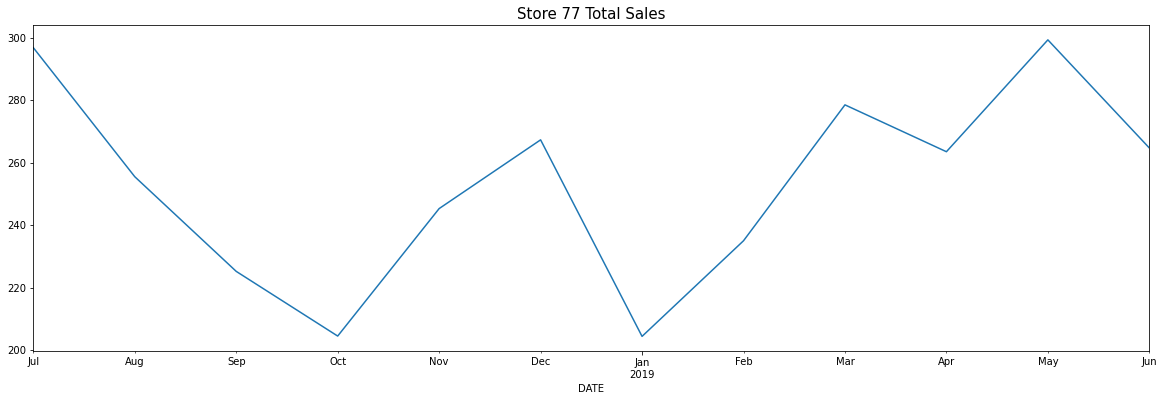

In [70]:
df3_77['TOT_SALES'].resample('M').sum().plot(figsize=(20,6))
plt.title('Store 77 Total Sales', fontsize=15)

We can observe two extreme drops in October 2018 and January 2019 and a spike in May 2019. January can be explained as New Year time, when customers are changing their purchase behaviour after spending too much money in December. However, October and May should be additionally investigated.

Text(0.5, 1.0, 'Store 86 Total Sales')

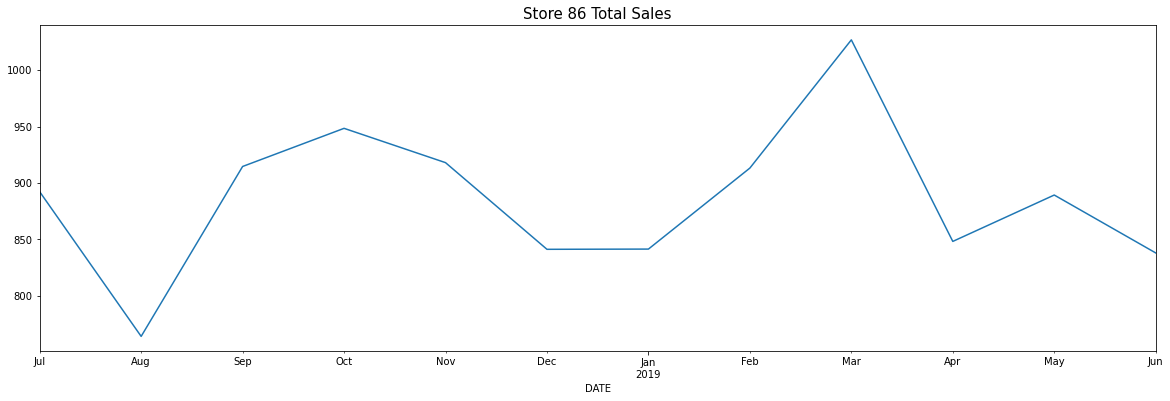

In [71]:
df3_86['TOT_SALES'].resample('M').sum().plot(figsize=(20,6))
plt.title('Store 86 Total Sales', fontsize=15)

For the store 86 we can observe a drop in August 2018 and a spike in March 2019. The same situation we have with the store 88 = a spike in March 2019.

Text(0.5, 1.0, 'Store 88 Total Sales')

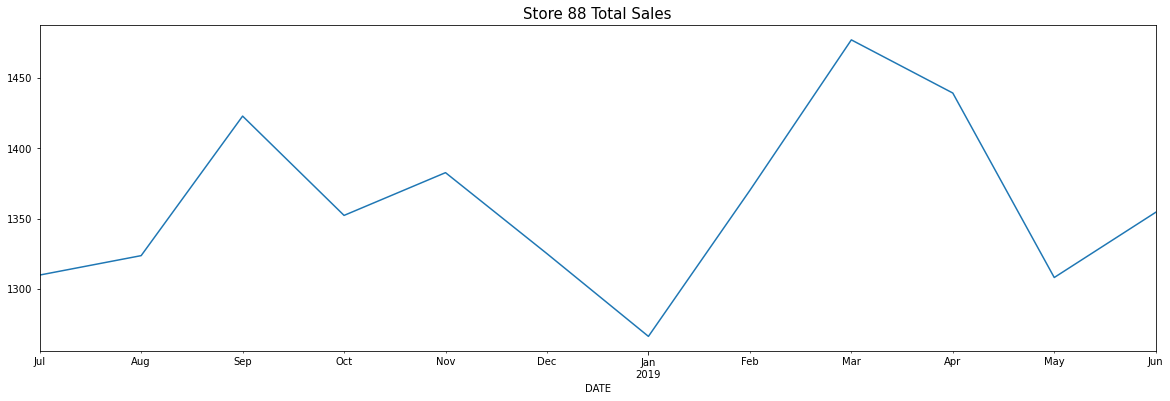

In [72]:
df3_88['TOT_SALES'].resample('M').sum().plot(figsize=(20,6))
plt.title('Store 88 Total Sales', fontsize=15)

Text(0.5, 1.0, 'Store 77 Total Customers')

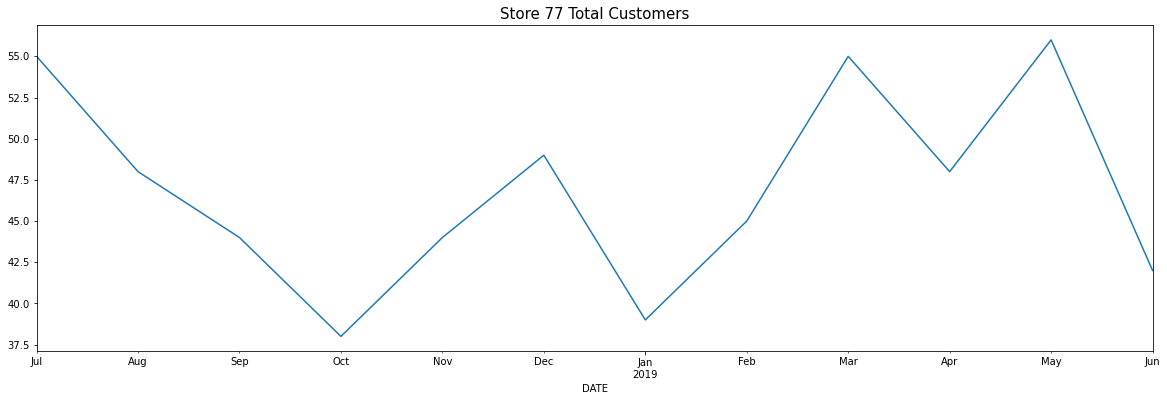

In [73]:
df3_77['Customer_count'].resample('M').sum().plot(figsize=(20,6))
plt.title('Store 77 Total Customers', fontsize=15)

Text(0.5, 1.0, 'Store 86 Total Customers')

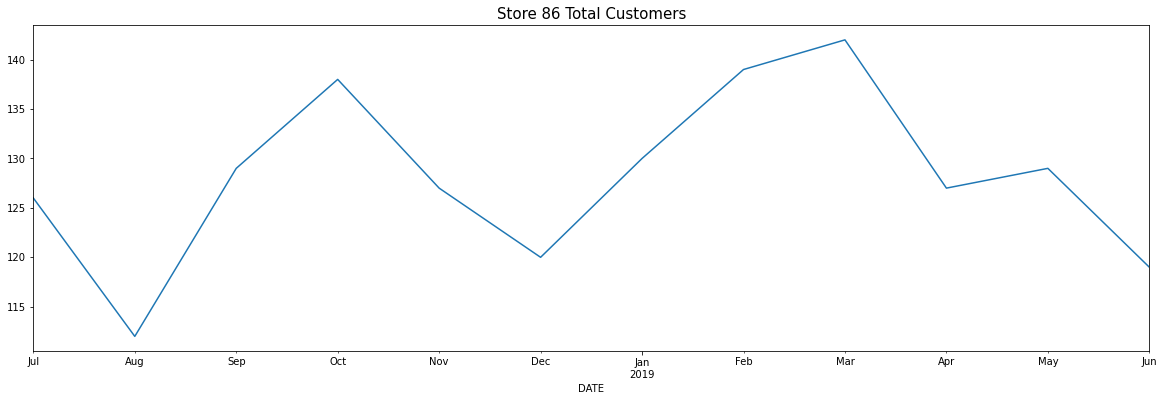

In [74]:
df3_86['Customer_count'].resample('M').sum().plot(figsize=(20,6))
plt.title('Store 86 Total Customers', fontsize=15)

Text(0.5, 1.0, 'Store 88 Total Customers')

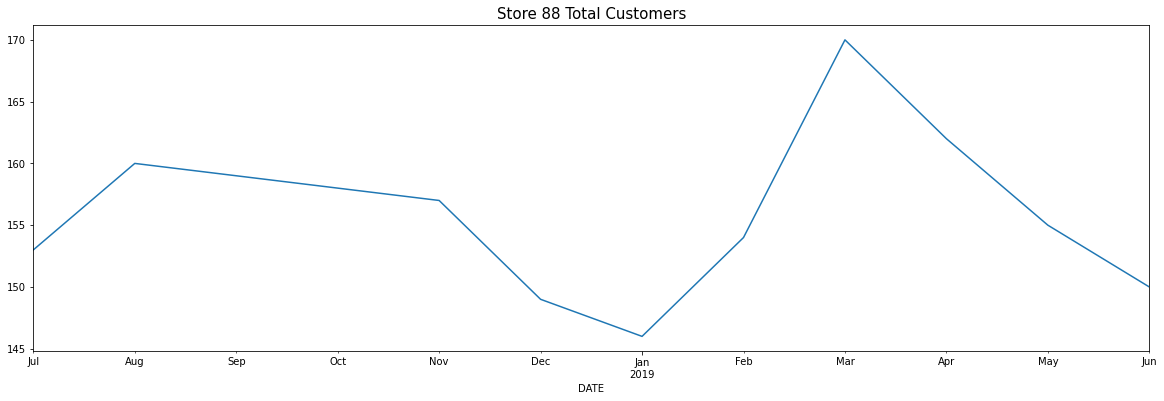

In [75]:
df3_88['Customer_count'].resample('M').sum().plot(figsize=(20,6))
plt.title('Store 88 Total Customers', fontsize=15)

We see that total number of customers plot has the same pattern as total sales plot.

### Creating the trial and the control samples

In [76]:
df3

,LYLTY_CARD_NBR,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,Customer_count
DATE,,,,,,,,,,,,
2018-07-01,104039,104,103937,53,RRD Sweet Chilli & Sour Cream 165g,2,6.0,165,RRD,OLDER SINGLES/COUPLES,Premium,1
2018-07-01,118107,118,121300,33,Cobs Popd Swt/Chlli &Sr/Cream Chips 110g,2,7.6,110,COBS,RETIREES,Mainstream,1
2018-07-01,226024,226,226348,114,Kettle Sensations Siracha Lime 150g,2,9.2,150,KETTLE,YOUNG FAMILIES,Premium,1
2018-07-01,152040,152,150459,25,Pringles SourCream Onion 134g,2,7.4,134,PRINGLES,YOUNG FAMILIES,Mainstream,1
2018-07-01,33140,33,30342,10,RRD SR Slow Rst Pork Belly 150g,2,5.4,150,RRD,YOUNG FAMILIES,Mainstream,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-30,90228,90,88954,77,Doritos Corn Chips Nacho Cheese 170g,2,8.8,170,DORITOS,YOUNG SINGLES/COUPLES,Premium,1
2019-06-30,199122,199,198088,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,150,DORITOS,NEW FAMILIES,Premium,1
2019-06-30,199117,199,198068,77,Doritos Corn Chips Nacho Cheese 170g,2,8.8,170,DORITOS,MIDAGE SINGLES/COUPLES,Mainstream,1


The trial was conducted between February 2019 and April 2019.

In [77]:
trial = df3.loc['2019-02-01':'2019-04-30']
trial

,LYLTY_CARD_NBR,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,Customer_count
DATE,,,,,,,,,,,,
2019-02-01,72051,72,70808,31,Infzns Crn Crnchers Tangy Gcamole 110g,2,7.6,110,INFUZIONS,OLDER SINGLES/COUPLES,Premium,1
2019-02-01,180140,180,181915,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175,KETTLE,YOUNG FAMILIES,Mainstream,1
2019-02-01,187134,187,189029,90,Tostitos Smoked Chipotle 175g,1,4.4,175,TOSTITOS,YOUNG FAMILIES,Budget,1
2019-02-01,81037,81,79891,36,Kettle Chilli 175g,2,10.8,175,KETTLE,YOUNG SINGLES/COUPLES,Mainstream,1
2019-02-01,166069,166,167498,57,Old El Paso Salsa Dip Tomato Mild 300g,2,10.2,300,OLD,OLDER SINGLES/COUPLES,Budget,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-04-30,112184,112,114914,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,150,KETTLE,YOUNG FAMILIES,Premium,1
2019-04-30,55228,55,49870,37,Smiths Thinly Swt Chli&S/Cream175G,2,6.0,175,SMITHS,YOUNG SINGLES/COUPLES,Premium,1
2019-04-30,73250,73,72562,93,Doritos Corn Chip Southern Chicken 150g,2,7.8,150,DORITOS,OLDER SINGLES/COUPLES,Budget,1


In [78]:
trial_unique = trial.drop_duplicates(subset='LYLTY_CARD_NBR')
trial_unique

,LYLTY_CARD_NBR,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,Customer_count
DATE,,,,,,,,,,,,
2019-02-01,72051,72,70808,31,Infzns Crn Crnchers Tangy Gcamole 110g,2,7.6,110,INFUZIONS,OLDER SINGLES/COUPLES,Premium,1
2019-02-01,180140,180,181915,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,175,KETTLE,YOUNG FAMILIES,Mainstream,1
2019-02-01,187134,187,189029,90,Tostitos Smoked Chipotle 175g,1,4.4,175,TOSTITOS,YOUNG FAMILIES,Budget,1
2019-02-01,81037,81,79891,36,Kettle Chilli 175g,2,10.8,175,KETTLE,YOUNG SINGLES/COUPLES,Mainstream,1
2019-02-01,166069,166,167498,57,Old El Paso Salsa Dip Tomato Mild 300g,2,10.2,300,OLD,OLDER SINGLES/COUPLES,Budget,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-04-30,238319,238,243175,59,Old El Paso Salsa Dip Tomato Med 300g,2,10.2,300,OLD,NEW FAMILIES,Budget,1
2019-04-30,41315,41,38263,70,Tyrrells Crisps Lightly Salted 165g,1,4.2,165,TYRRELLS,YOUNG FAMILIES,Premium,1
2019-04-30,55228,55,49870,37,Smiths Thinly Swt Chli&S/Cream175G,2,6.0,175,SMITHS,YOUNG SINGLES/COUPLES,Premium,1


<AxesSubplot:title={'center':'Shop 77 Total Transactions'}, xlabel='DATE'>

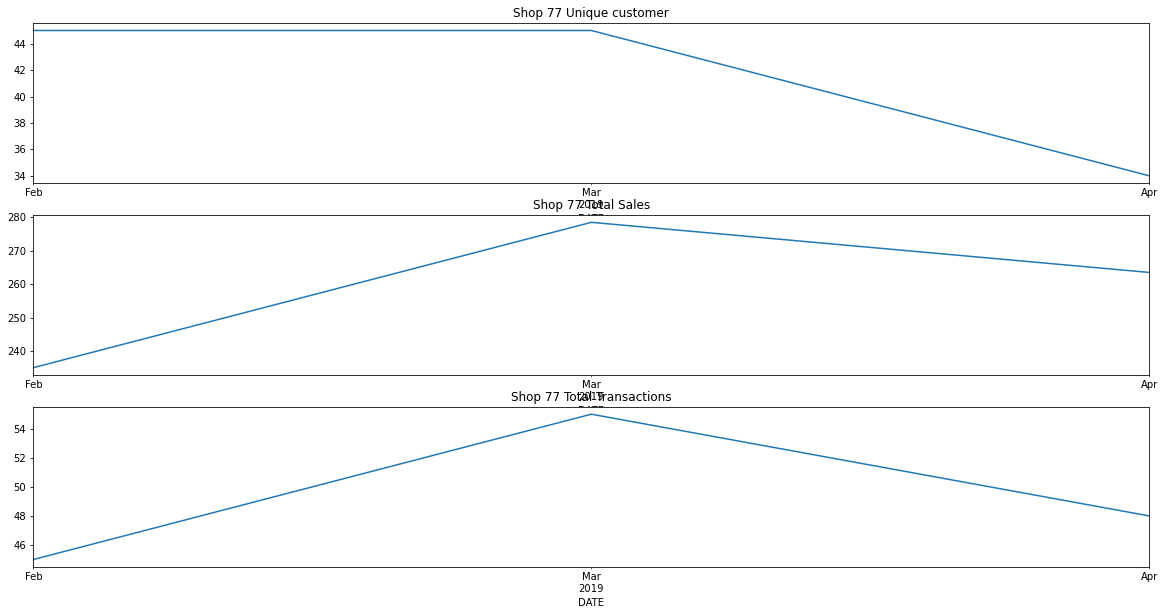

In [79]:
trial_77_uniq = trial_unique.loc[trial_unique.STORE_NBR == 77]
trial_77 = trial.loc[trial.STORE_NBR == 77]

fig, axes = plt.subplots(nrows=3, figsize=(20,10))

trial_77_uniq['Customer_count'].resample('M').sum().plot(ax=axes[0], title = 'Shop 77 Unique customer')
trial_77['TOT_SALES'].resample('M').sum().plot(ax=axes[1], title = 'Shop 77 Total Sales')
trial_77['Customer_count'].resample('M').sum().plot(ax=axes[2], title = 'Shop 77 Total Transactions')

<AxesSubplot:title={'center':'Shop 86 Total Transactions'}, xlabel='DATE'>

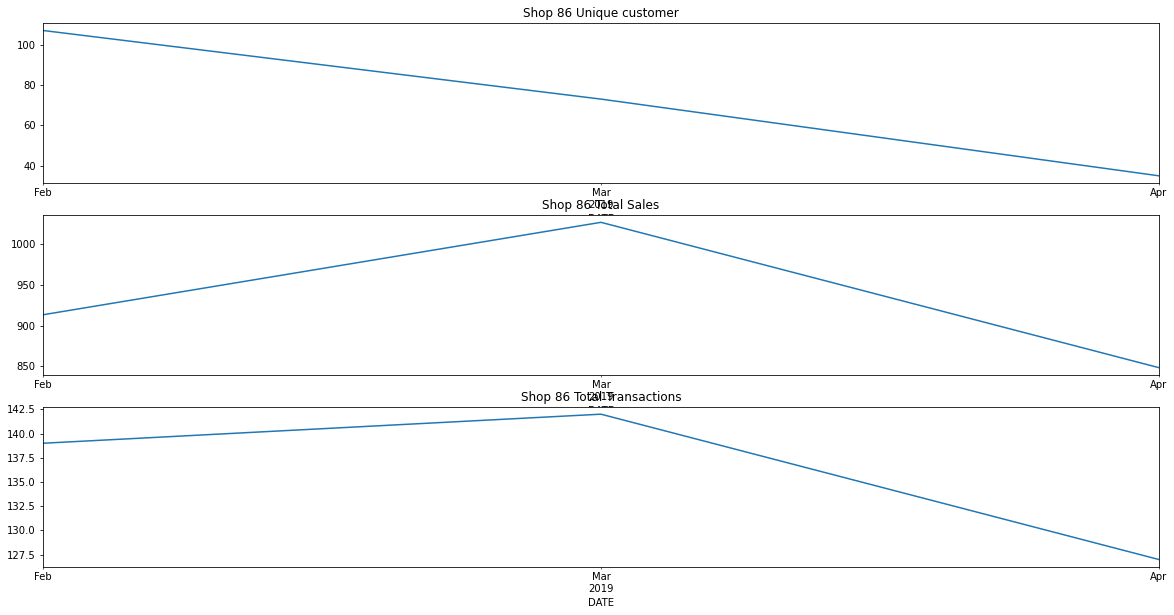

In [80]:
trial_86_uniq = trial_unique.loc[trial_unique.STORE_NBR == 86]
trial_86 = trial.loc[trial.STORE_NBR == 86]

fig, axes = plt.subplots(nrows=3, figsize=(20,10))

trial_86_uniq['Customer_count'].resample('M').sum().plot(ax=axes[0], title = 'Shop 86 Unique customer')
trial_86['TOT_SALES'].resample('M').sum().plot(ax=axes[1], title = 'Shop 86 Total Sales')
trial_86['Customer_count'].resample('M').sum().plot(ax=axes[2], title = 'Shop 86 Total Transactions')

<AxesSubplot:title={'center':'Shop 88 Total Transactions'}, xlabel='DATE'>

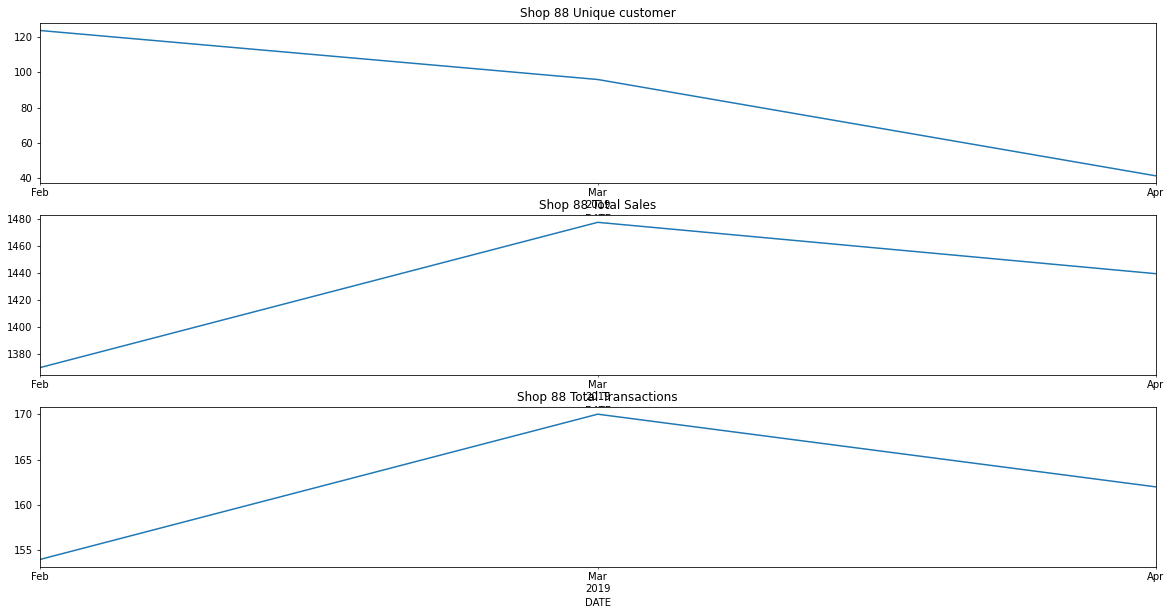

In [81]:
trial_88_uniq = trial_unique.loc[trial_unique.STORE_NBR == 88]
trial_88 = trial.loc[trial.STORE_NBR == 88]

fig, axes = plt.subplots(nrows=3, figsize=(20,10))

trial_88_uniq['Customer_count'].resample('M').sum().plot(ax=axes[0], title = 'Shop 88 Unique customer')
trial_88['TOT_SALES'].resample('M').sum().plot(ax=axes[1], title = 'Shop 88 Total Sales')
trial_88['Customer_count'].resample('M').sum().plot(ax=axes[2], title = 'Shop 88 Total Transactions')

### Selecting control sample for the shop 77

In [82]:
control = df3.loc['2018-11-01':'2019-01-30']
control

,LYLTY_CARD_NBR,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,Customer_count
DATE,,,,,,,,,,,,
2018-11-01,70186,70,68568,57,Old El Paso Salsa Dip Tomato Mild 300g,2,10.2,300,OLD,RETIREES,Mainstream,1
2018-11-01,219157,219,218910,21,WW Sour Cream &OnionStacked Chips 160g,2,3.8,160,WOOLWORTHS,YOUNG FAMILIES,Budget,1
2018-11-01,118223,118,121946,87,Infuzions BBQ Rib Prawn Crackers 110g,2,7.6,110,INFUZIONS,RETIREES,Mainstream,1
2018-11-01,21337,21,18047,26,Pringles Sweet&Spcy BBQ 134g,2,7.4,134,PRINGLES,RETIREES,Budget,1
2018-11-01,43197,43,39961,17,Kettle Sensations BBQ&Maple 150g,2,9.2,150,KETTLE,YOUNG FAMILIES,Budget,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-30,191143,191,192614,6,RRD Lime & Pepper 165g,2,6.0,165,RRD,RETIREES,Budget,1
2019-01-30,17197,17,14920,114,Kettle Sensations Siracha Lime 150g,2,9.2,150,KETTLE,MIDAGE SINGLES/COUPLES,Mainstream,1
2019-01-30,129113,129,132889,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,MIDAGE SINGLES/COUPLES,Mainstream,1


<AxesSubplot:title={'center':'Shop 77 Total Sales'}, xlabel='DATE'>

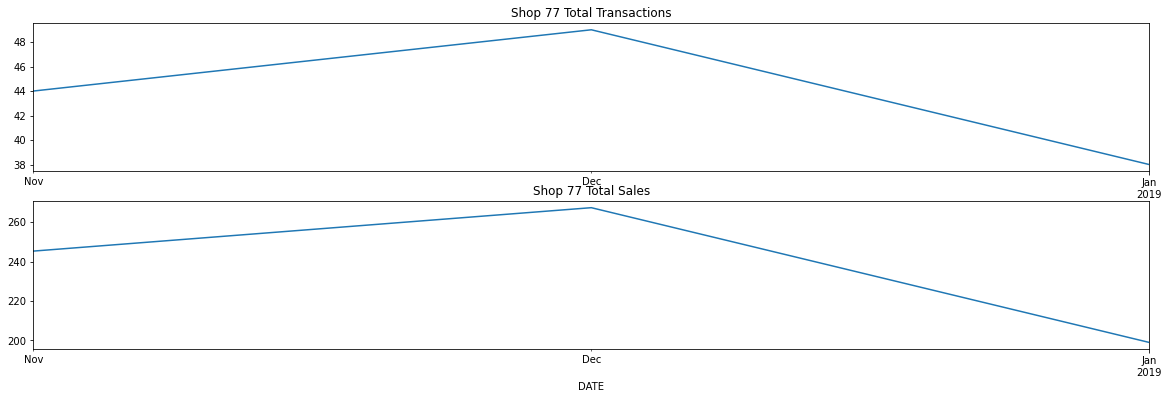

In [83]:
control_77 = control.loc[control.STORE_NBR == 77]

fig, axes = plt.subplots(nrows=2, figsize=(20,6))

control_77['Customer_count'].resample('M').sum().plot(ax=axes[0], title = 'Shop 77 Total Transactions')
control_77['TOT_SALES'].resample('M').sum().plot(ax=axes[1], title = 'Shop 77 Total Sales')

For the store and each month calculating total sales, number of customers, transactions per customer, chips per customer and the average price per unit. We have months selected: November, December, January.

##### TOTAL SALES

In [84]:
total_sales = control_77['TOT_SALES'].resample('M').sum()
total_sales = pd.DataFrame(total_sales)
total_sales.reset_index(inplace=True)
total_sales = total_sales.replace({'2018-11-30':'NOVEMBER', '2018-12-31':'DECEMBER', '2019-01-31':'JANUARY'})
total_sales

,DATE,TOT_SALES
0,NOVEMBER,245.3
1,DECEMBER,267.3
2,JANUARY,199.0


##### NUMBER OF  CUSTOMERS

In [85]:
total_customer = control_77['Customer_count'].resample('M').sum()
total_customer = pd.DataFrame(total_customer)
total_customer.reset_index(inplace=True)
total_customer = total_customer.replace({'2018-11-30':'NOVEMBER', '2018-12-31':'DECEMBER', '2019-01-31':'JANUARY'})
total_customer

,DATE,Customer_count
0,NOVEMBER,44
1,DECEMBER,49
2,JANUARY,38


##### NUMBER OF UNIQUE CUSTOMERS

In [86]:
total_customer = control_77.drop_duplicates(subset='LYLTY_CARD_NBR')
total_customer = total_customer['Customer_count'].resample('M').sum()
total_customer = pd.DataFrame(total_customer)
total_customer.reset_index(inplace=True)
total_customer = total_customer.replace({'2018-11-30':'NOVEMBER', '2018-12-31':'DECEMBER', '2019-01-31':'JANUARY'})
total_customer

,DATE,Customer_count
0,NOVEMBER,41
1,DECEMBER,40
2,JANUARY,30


In November in the shop 77 we had 44 unique customers (3 non unique), December - 40 (9 came again) and January 30 (8 returned).

##### NOVEMBER: NUMBER OF TRANSACTIONS PER CUSTOMER, CHIPS PER CUSTOMER, AVERAGE PRICE PER UNIT

In [87]:
total_transactions_november = control_77.loc['2018-11-01':'2018-11-30']

In [88]:
total_transactions_november = total_transactions_november.groupby(by='LYLTY_CARD_NBR').sum()
total_transactions_november['Transactions_per_customer'] = total_transactions_november['Customer_count']
total_transactions_november = total_transactions_november[['Transactions_per_customer','PROD_QTY']]
total_transactions_november = total_transactions_november.rename(columns={'Transactions_per_customer':'TRANS_PER_CUST',
                                                                          'PROD_QTY':'CHIPS_PER_CUST'})
total_transactions_november

,TRANS_PER_CUST,CHIPS_PER_CUST
LYLTY_CARD_NBR,,
77021,1,2
77032,1,2
77035,1,2
77049,1,1
77050,1,1
77053,1,2
77056,1,1
77066,1,2
77078,1,2


In [89]:
control_77['PRICE_PER_UNIT'] = control_77['TOT_SALES']/control_77['PROD_QTY']
control_77

,LYLTY_CARD_NBR,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,Customer_count,PRICE_PER_UNIT
DATE,,,,,,,,,,,,,
2018-11-02,77461,77,75416,103,RRD Steak & Chimuchurri 150g,2,5.4,150,RRD,NEW FAMILIES,Premium,1,2.7
2018-11-03,77474,77,75431,36,Kettle Chilli 175g,2,10.8,175,KETTLE,RETIREES,Mainstream,1,5.4
2018-11-03,77286,77,75222,50,Tostitos Lightly Salted 175g,1,4.4,175,TOSTITOS,NEW FAMILIES,Budget,1,4.4
2018-11-04,77056,77,74973,50,Tostitos Lightly Salted 175g,1,4.4,175,TOSTITOS,RETIREES,Budget,1,4.4
2018-11-04,77271,77,75206,93,Doritos Corn Chip Southern Chicken 150g,1,3.9,150,DORITOS,OLDER FAMILIES,Mainstream,1,3.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-27,77434,77,75379,88,Kettle Honey Soy Chicken 175g,1,5.4,175,KETTLE,YOUNG SINGLES/COUPLES,Mainstream,1,5.4
2019-01-27,77388,77,75327,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0,175,SMITHS,YOUNG FAMILIES,Mainstream,1,3.0
2019-01-27,77404,77,75344,16,Smiths Crinkle Chips Salt & Vinegar 330g,2,11.4,330,SMITHS,RETIREES,Premium,1,5.7


In [90]:
price_per_unit_nov = round(control_77.loc['2018-11-01':'2018-11-30'].groupby(by='BRAND').mean(),2)
price_per_unit_nov = price_per_unit_nov['PRICE_PER_UNIT']
price_per_unit_nov = pd.DataFrame(price_per_unit_nov)
price_per_unit_nov

,PRICE_PER_UNIT
BRAND,
BURGER,2.30
CCS,2.10
DORITOS,4.98
FRENCH,3.00
GRNWVES,3.60
INFUZIONS,3.80
KETTLE,4.93
NATURAL,3.00
OLD,5.10


In [91]:
price_per_unit_nov.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, BURGER to WOOLWORTHS
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PRICE_PER_UNIT  18 non-null     float64
dtypes: float64(1)
memory usage: 288.0+ bytes


##### DECEMBER: NUMBER OF TRANSACTIONS PER CUSTOMER, CHIPS PER CUSTOMER, AVERAGE PRICE PER UNIT

In [92]:
total_transactions_december = control_77.loc['2018-12-01':'2018-12-31']

In [93]:
total_transactions_december = total_transactions_december.groupby(by='LYLTY_CARD_NBR').sum()
total_transactions_december['Transactions_per_customer'] = total_transactions_december['Customer_count']
total_transactions_december = total_transactions_december[['Transactions_per_customer','PROD_QTY']]
total_transactions_december = total_transactions_december.rename(columns={'Transactions_per_customer':'TRANS_PER_CUST',
                                                                          'PROD_QTY':'CHIPS_PER_CUST'})
total_transactions_december

,TRANS_PER_CUST,CHIPS_PER_CUST
LYLTY_CARD_NBR,,
77057,1,2
77066,1,1
77073,1,1
77080,1,1
77082,1,2
77089,1,1
77098,1,2
77102,1,2
77108,1,2


In [94]:
price_per_unit_dec = round(control_77.loc['2018-12-01':'2018-12-31'].groupby(by='BRAND').mean(),2)
price_per_unit_dec = price_per_unit_dec['PRICE_PER_UNIT']
price_per_unit_dec = pd.DataFrame(price_per_unit_dec)
price_per_unit_dec

,PRICE_PER_UNIT
BRAND,
CCS,2.10
CHEETOS,2.80
CHEEZELS,5.70
COBS,3.80
DORITOS,3.93
GRNWVES,3.48
INFUZIONS,3.10
KETTLE,5.20
RRD,2.70


In [95]:
price_per_unit_dec.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15 entries, CCS to WOOLWORTHS
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PRICE_PER_UNIT  15 non-null     float64
dtypes: float64(1)
memory usage: 240.0+ bytes


##### January: NUMBER OF TRANSACTIONS PER CUSTOMER, CHIPS PER CUSTOMER, AVERAGE PRICE PER UNIT

In [96]:
total_transactions_january = control_77.loc['2019-01-01':'2019-01-31']

In [97]:
total_transactions_january = total_transactions_january.groupby(by='LYLTY_CARD_NBR').sum()
total_transactions_january['Transactions_per_customer'] = total_transactions_january['Customer_count']
total_transactions_january = total_transactions_january[['Transactions_per_customer','PROD_QTY']]
total_transactions_january = total_transactions_january.rename(columns={'Transactions_per_customer':'TRANS_PER_CUST',
                                                                          'PROD_QTY':'CHIPS_PER_CUST'})
total_transactions_january

,TRANS_PER_CUST,CHIPS_PER_CUST
LYLTY_CARD_NBR,,
77001,1,2
77006,1,2
77026,1,1
77043,2,4
77079,1,2
77102,1,1
77109,1,2
77138,1,2
77149,1,2


In [98]:
price_per_unit_jan = round(control_77.loc['2019-01-01':'2019-01-31'].groupby(by='BRAND').mean(),2)
price_per_unit_jan = price_per_unit_jan['PRICE_PER_UNIT']
price_per_unit_jan = pd.DataFrame(price_per_unit_jan)
price_per_unit_jan

,PRICE_PER_UNIT
BRAND,
CCS,2.10
CHEETOS,2.80
CHEEZELS,2.10
DORITOS,4.40
FRENCH,3.00
INFUZIONS,2.40
KETTLE,4.84
NATURAL,3.00
PRINGLES,3.70


In [99]:
price_per_unit_jan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16 entries, CCS to WOOLWORTHS
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PRICE_PER_UNIT  16 non-null     float64
dtypes: float64(1)
memory usage: 256.0+ bytes


#### Сomparative barplot November/December/January price per unit

In [100]:
price_per_unit_nov = price_per_unit_nov.reset_index()
price_per_unit_dec = price_per_unit_dec.reset_index()
price_per_unit_jan = price_per_unit_jan.reset_index()

In [101]:
price_per_unit_nov.sort_values(by='BRAND', ascending = True, inplace=True)
price_per_unit_nov.rename(columns = {'PRICE_PER_UNIT':'PRICE_PER_UNIT_NOV'}, inplace = True)
price_per_unit_nov

,BRAND,PRICE_PER_UNIT_NOV
0,BURGER,2.30
1,CCS,2.10
2,DORITOS,4.98
3,FRENCH,3.00
4,GRNWVES,3.60
5,INFUZIONS,3.80
6,KETTLE,4.93
7,NATURAL,3.00
8,OLD,5.10
9,PRINGLES,3.70


In [102]:
price_per_unit_dec.sort_values(by='BRAND', ascending = True, inplace=True)
price_per_unit_dec.rename(columns = {'PRICE_PER_UNIT':'PRICE_PER_UNIT_DEC'}, inplace = True)
price_per_unit_dec

,BRAND,PRICE_PER_UNIT_DEC
0,CCS,2.10
1,CHEETOS,2.80
2,CHEEZELS,5.70
3,COBS,3.80
4,DORITOS,3.93
5,GRNWVES,3.48
6,INFUZIONS,3.10
7,KETTLE,5.20
8,RRD,2.70
9,SMITHS,4.15


In [103]:
price_per_unit_jan.sort_values(by='BRAND', ascending = True, inplace=True)
price_per_unit_jan.rename(columns = {'PRICE_PER_UNIT':'PRICE_PER_UNIT_JAN'}, inplace = True)
price_per_unit_jan

,BRAND,PRICE_PER_UNIT_JAN
0,CCS,2.10
1,CHEETOS,2.80
2,CHEEZELS,2.10
3,DORITOS,4.40
4,FRENCH,3.00
5,INFUZIONS,2.40
6,KETTLE,4.84
7,NATURAL,3.00
8,PRINGLES,3.70
9,RRD,2.70


In [104]:
result = pd.merge(price_per_unit_nov, price_per_unit_dec, on = ['BRAND'], how = 'outer')
result = pd.merge(result, price_per_unit_jan, on = ['BRAND'], how = 'outer')
result = result.fillna(0)
result

,BRAND,PRICE_PER_UNIT_NOV,PRICE_PER_UNIT_DEC,PRICE_PER_UNIT_JAN
0,BURGER,2.30,0.00,0.00
1,CCS,2.10,2.10,2.10
2,DORITOS,4.98,3.93,4.40
3,FRENCH,3.00,0.00,3.00
4,GRNWVES,3.60,3.48,0.00
5,INFUZIONS,3.80,3.10,2.40
6,KETTLE,4.93,5.20,4.84
7,NATURAL,3.00,0.00,3.00
8,OLD,5.10,0.00,0.00
9,PRINGLES,3.70,0.00,3.70


<AxesSubplot:xlabel='BRAND'>

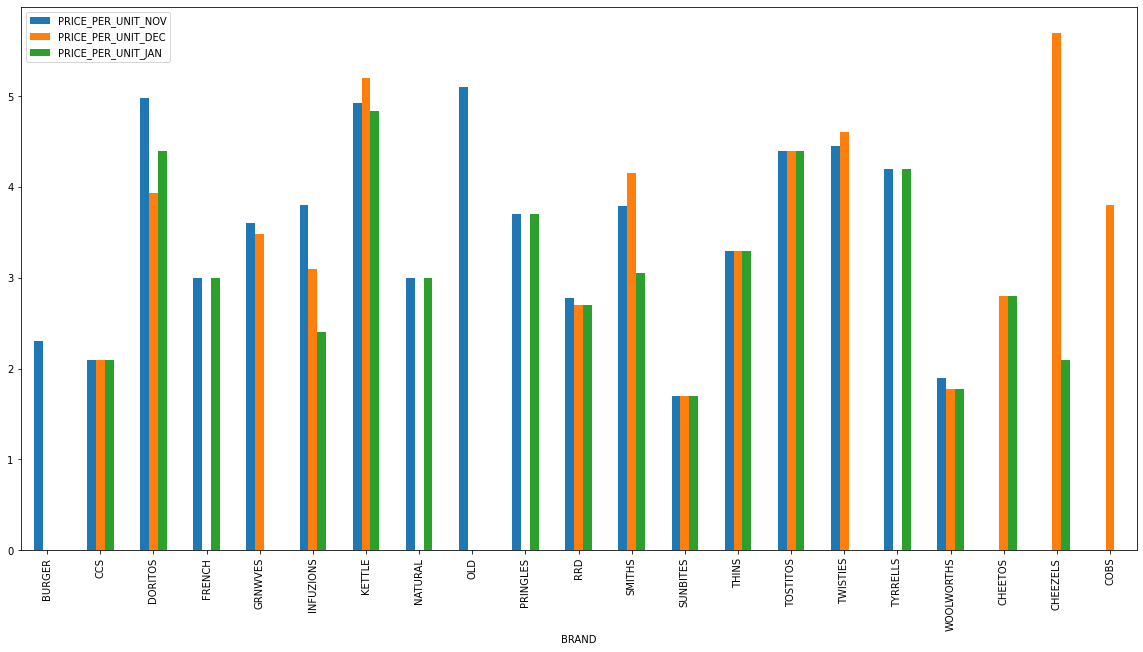

In [105]:
result.plot(x='BRAND', y=['PRICE_PER_UNIT_NOV', 'PRICE_PER_UNIT_DEC', 'PRICE_PER_UNIT_JAN'], kind='bar',figsize = (20,10))

Some observed insights: BURGER brand wasn't sold in December and January, as well as OLD brand. Doritos decreased in price in December and January comparing to November. CHEEZELS drastically dropped in price from in January, while THINS, TOSTITOS and THINS remained the same.